In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import flet as ft
from flet.matplotlib_chart import MatplotlibChart

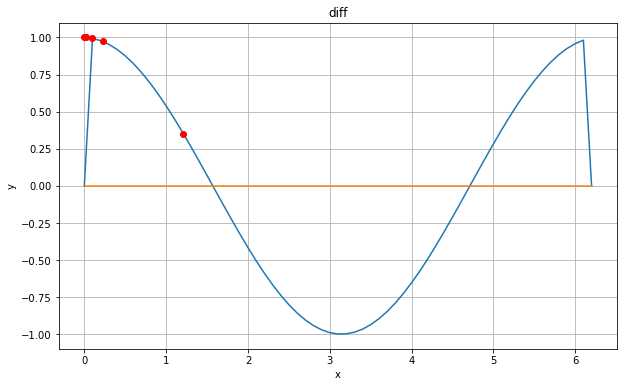

In [228]:
def my_central_diff(y, dt):
    # y : compute function
    # dt : step size
    # base = np.arange(0, 2*np.pi, h)     #設定範圍
    n=len(y)                        #取得y資料的長度(數量)
    z = np.zeros(n)                 
    for i in range(1,n-1):         #用迴圈去算每個取樣點
        z[i] = (y[i+1]-y[i-1])/(2*dt)     #central difference計算
    return z

def main(page: ft.Page):
    global diff_function  
    dt = 0.1            #設定dt要多少
    x = np.arange(0,2*np.pi,dt)     #統一X
    c=np.sin(x) #使用np的sin&cos
    d=np.cos(x)
    zero = 0*x      #劃出0
    page.title = "sin(x) cos(x) function Differential"
    page.window_width = 750     #設定長寬
    page.window_height = 900
    page.horizontal_alignment = ft.CrossAxisAlignment.CENTER #把所有都對其在正中間
    
    def choose_func(aaa):
        global func
        func = aaa.control.data #將按下的按鈕值存入
        page.add(ft.Text(f"The function of your choice is : { func }",size= 20))    #輸出選擇function文字
    
    def diff_func(aaa): #微分
        if func == "sin(x)":        
            diff_function = my_central_diff(c,dt)#如果選sin就輸出cos
        elif func == "cos(x)":
            diff_function = my_central_diff(d,dt)#如果選cos就輸出sin
        plt.figure(figsize = (10, 6))   
        plt.plot(x, diff_function)          #畫central_diff出來的圖
        plt.plot(x,zero,label = "zero" )    #畫0為參考
        plt.xlabel("x")
        plt.ylabel("y")
        plt.grid()#格線
        page.add(MatplotlibChart(plt, expand=True))

    def submit_x(e):
        t2.value = f"your x value is:  '{tb1.value}'."  #顯示輸入的x值
        g=int(tb1.value)/100        #輸整數除100
        page.update()
        if func == "sin(x)":        #使用np的sin&cos
            ans = np.cos(g)
        elif func == "cos(x)":
            ans = -1*np.sin(g)          
        t3.value = f"your y value is:{ans}."    
        plt.plot(g , ans , 'ro')  #在圖上標點
        page.update()
    # t = ft.Text(value="Hello, welcome to this page!", color="green" , size = 10)
    # page.add(t)
    btn1 = ft.ElevatedButton(text = "sin(x)" , data="sin(x)" , width=530, on_click=choose_func )#按鈕
    btn2 = ft.ElevatedButton(text = "cos(x)" , data="cos(x)" , width=530, on_click=choose_func )#按鈕
    btn3 = ft.ElevatedButton(text = "start diff" , width = 300, on_click = diff_func)
    page.add(btn1,btn2,btn3)
    page.update()
    t2 = ft.Text()
    t3 = ft.Text()
    tb1 = ft.TextField(label="x value(from 0 to 628)")      #輸入X計算Y
    b = ft.ElevatedButton(text="Submit", on_click=submit_x) #按鈕
    page.add(tb1,b,t2,t3)
    
ft.app(target=main)

In [ ]:
def main(page: ft.Page):#不使用central_diff
    
    global diff_function    
    dt = 0.1            #設定dt要多少
    x = np.arange(0,2*np.pi,dt)     #統一X
    zero = 0*x      #劃出0
    page.title = "sin(x) cos(x) function Differential"
    page.window_width = 750     #設定長寬
    page.window_height = 900
    page.horizontal_alignment = ft.CrossAxisAlignment.CENTER #把所有都對其在正中間
    
    def choose_func(aaa):
        global func
        func = aaa.control.data #將按下的按鈕值存入
        page.add(ft.Text(f"The function of your choice is : { func }",size= 20))    #輸出選擇終點站文字
    
    def diff_func(aaa): #微分
        if func == "sin(x)":        #如果選sin就輸出cos
            diff_function = np.cos(x)
        elif func == "cos(x)":
            diff_function = -1*np.sin(x)#如果選cos就輸出sin
        plt.figure(figsize = (10, 6))   
        plt.plot(x, diff_function)
        plt.plot(x,zero,label = "zero" )
        plt.xlabel("x")
        plt.ylabel("y")
        plt.grid()
        plt.title("diff")
        page.add(MatplotlibChart(plt, expand=True))

    def submit_x(e):
        t2.value = f"your x value is:  '{tb1.value}'."
        g=int(tb1.value)/100
        page.update()
        if func == "sin(x)":
            ans = np.cos(g)
        elif func == "cos(x)":
            ans = -1*np.sin(g)
        t3.value = f"your y value is:{ans}."
        plt.plot(g , ans , 'ro')  #在圖上標點
        page.update()
        
    # t = ft.Text(value="Hello, welcome to this page!", color="green" , size = 10)
    # page.add(t)
    btn1 = ft.ElevatedButton(text = "sin(x)" , data="sin(x)" , width=530, on_click=choose_func )#按鈕
    btn2 = ft.ElevatedButton(text = "cos(x)" , data="cos(x)" , width=530, on_click=choose_func )#按鈕
    btn3 = ft.ElevatedButton(text = "start diff" , width = 300, on_click = diff_func)
    page.add(btn1,btn2,btn3)
    page.update()
    t2 = ft.Text()
    t3 = ft.Text()
    tb1 = ft.TextField(label="x value(from 0 to 628)")      #輸入X計算Y
    b = ft.ElevatedButton(text="Submit", on_click=submit_x) #按鈕
    page.add(tb1,b,t2,t3)
    
ft.app(target=main)